In [2]:
!pip install -q tensorflow matplotlib

Saving lop_rabbit_easter.jpg to lop_rabbit_easter.jpg


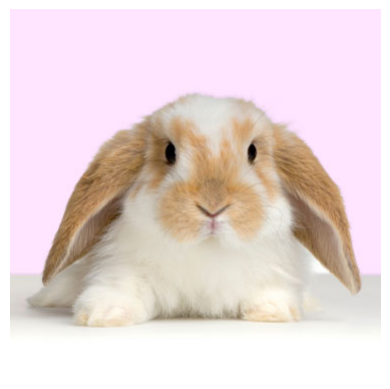

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1. guinea_pig - 45.79%
2. Angora - 13.09%
3. hamster - 4.66%


In [6]:
from google.colab import files
uploaded = files.upload()

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image_path = list(uploaded.keys())[0]
img = Image.open(image_path)
img = img.convert('RGB')  # Ensure it's RGB
plt.imshow(img)
plt.axis('off')
plt.show()


import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

model = MobileNetV2(weights='imagenet')


img_resized = img.resize((224, 224))
img_array = image.img_to_array(img_resized)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = model.predict(img_array)
decoded = decode_predictions(predictions, top=3)[0]

for i, (imagenet_id, label, confidence) in enumerate(decoded):
    print(f"{i+1}. {label} - {confidence * 100:.2f}%")
